<a href="https://colab.research.google.com/github/MinhBaLe/Project-food-composition/blob/main/TP7_note_ISD_Copie_%C3%A9tudiant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation des modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme() # permet d'obtenir le fonc gris avec les lignes blanches

from sklearn.impute import KNNImputer

# Préparation et importation des données

Nous importons et préparons les données.

In [2]:
def get_dataset(num_etud=19026500,N = 2000):
  food = pd.read_csv("https://perso.univ-rennes1.fr/valerie.monbet/ISD/FoodComposition.csv",
                    sep=";")
  food.head()

  X = food._get_numeric_data()
  X = X.rename(index=food["Shrt_Desc"])
  coln = X.columns.to_list()
  # on retire une partie des variables
  list_for_removing =  ['NDB_No','Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)',  'Zinc_(mg)',
                        'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Thiamin_(mg)', 'Riboflavin_(mg)',
                        'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)',
                        'Food_Folate_(µg)', 'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)',
                        'Vit_A_IU', 'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
                        'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)', 'Vit_D_µg',
                        'Vit_D_IU', 'Vit_K_(µg)','GmWt_1','GmWt_2','Refuse_Pct']
  X = X.drop(columns=list_for_removing)
  ij_na = np.where(np.isnan(X))
  nb_na_row = [np.sum(ij_na[0]==i) for i in np.unique(ij_na[0])]
  kc = np.where(np.asarray(nb_na_row)>0)
  unique_values_kc = np.unique(ij_na[0])[kc]
  Xpd = pd.DataFrame(X)

  # Remove lines from X based on unique_values_kc
  Xc = Xpd.drop(food["Shrt_Desc"][unique_values_kc], axis=0)
  ij_na = np.where(np.isnan(Xc))
  nb_na_col = [np.sum(ij_na[1]==i) for i in np.unique(ij_na[1])]
  kc = np.where(np.asarray(nb_na_col)>1000)
  unique_values_kc = np.unique(ij_na[1])[kc]
  Xpd = pd.DataFrame(Xc)
  colnames = [x for x in Xpd.columns.to_list() if x not in Xpd.columns[unique_values_kc].to_list()]
  # Remove lines from X based on unique_values_kc
  Xc = Xpd.drop(Xpd.columns[unique_values_kc], axis=1)
  imputer = KNNImputer(n_neighbors=10,
                      weights="distance")
  Xci = imputer.fit_transform(Xc)
  n = Xci.shape[0]
  np.random.seed(seed=num_etud)
  ii =  np.random.randint(n, size=(N,))
  Xsubset = Xci[ii,:]
  Xsubset = pd.DataFrame(Xsubset)
  Xsubset.columns = colnames
  noms = Xc.index.to_list()
  noms_subset = [noms[i] for i in ii]
  Xsubset.index = noms_subset

  # Convert some columns
  Xsubset["has_fiber"] = (Xsubset["Fiber_TD_(g)"] > 0)*1
  Xsubset["has_vitamine"] = (Xsubset["Vit_C_(mg)"] > 0)*1
  Xsubset["sugar"] = 0
  Xsubset.loc[(Xsubset["Sugar_Tot_(g)"] == 0), "sugar"] = "no"
  Xsubset.loc[(Xsubset["Sugar_Tot_(g)"] > 0), "sugar"] = "little"
  Xsubset.loc[(Xsubset["Sugar_Tot_(g)"] > Xsubset["Sugar_Tot_(g)"].mean()), "sugar"] = "a lot"
  Xsubset = Xsubset.drop(columns=["Fiber_TD_(g)", "Vit_C_(mg)", "Sugar_Tot_(g)"])

  return Xsubset


In [3]:
food_df = get_dataset(num_etud=19026500) # ici remplacer par votre numero d'étudiant.

<ipython-input-2-7c5b096d6c0d>:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'no' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Xsubset.loc[(Xsubset["Sugar_Tot_(g)"] == 0), "sugar"] = "no"


In [4]:
food_df

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Calcium_(mg),Sodium_(mg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),has_fiber,has_vitamine,sugar
INF FORM.MEAD JOHNSON.ENFAMIL.NUTRAMIGEN.W/IRON.LC.NOT RECON,75.70,127.0,3.53,6.73,0.92,13.12,120.0,60.0,2.879,2.493,1.159,0.0,0,1,a lot
CAMPBELL'S RED&WHITE.CHICK WON TON SOUP.COND,89.10,40.0,2.38,0.79,1.38,6.35,0.0,690.0,0.397,0.397,0.000,4.0,0,0,little
BEEF.NZ.IMP.EYE RND.LN & FAT.RAW,72.90,129.0,19.88,4.92,1.00,1.32,4.0,39.0,1.573,1.549,0.232,48.0,0,0,no
"BEEF.RND.EYE OF RND.RST.LN.1/8"" FAT.ALL GRDS.RAW",73.43,124.0,22.60,3.00,1.08,0.00,20.0,60.0,1.027,1.263,0.129,59.0,0,0,no
VEAL.SEAM FAT ONLY.CKD,35.99,505.0,11.16,50.17,0.57,2.11,43.0,87.0,16.316,20.589,2.972,82.0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHICKEN.BROILERS OR FRYERS.DK MEAT.MEAT&SKN.CKD.FRIED.FLR,50.82,285.0,27.22,16.91,0.97,4.08,17.0,89.0,4.580,6.660,3.910,92.0,0,0,no
MACARONI & CHS.FRZ ENTREE,69.39,149.0,5.60,6.41,1.31,17.28,114.0,290.0,2.608,1.433,1.363,10.0,1,0,little
USDA COMMODITY.PORK.CURED.HAM.BNLESS.CKD.HTD,71.80,149.0,18.84,7.62,3.50,0.00,6.0,1155.0,1.701,2.864,0.747,73.0,0,1,no
BABYFOOD.MULTIGRAIN WHL GRAIN CRL.DRY,4.58,405.0,6.25,6.25,2.03,80.89,750.0,0.0,1.058,1.291,2.596,0.0,1,0,a lot


Question 1

In [5]:
food_df.shape
print("Nombre d'observations :", food_df.shape[0])
print("Nombre de variables :", food_df.shape[1])


Nombre d'observations : 2000
Nombre de variables : 15


Question 2

In [6]:
categorical_variables = ["has_fiber","has_vitamine","sugar"]
categorical_valeurs = {col: food_df[col].unique().tolist() for col in categorical_variables}
print(categorical_valeurs)


{'has_fiber': [0, 1], 'has_vitamine': [1, 0], 'sugar': ['a lot', 'little', 'no']}


Question 3

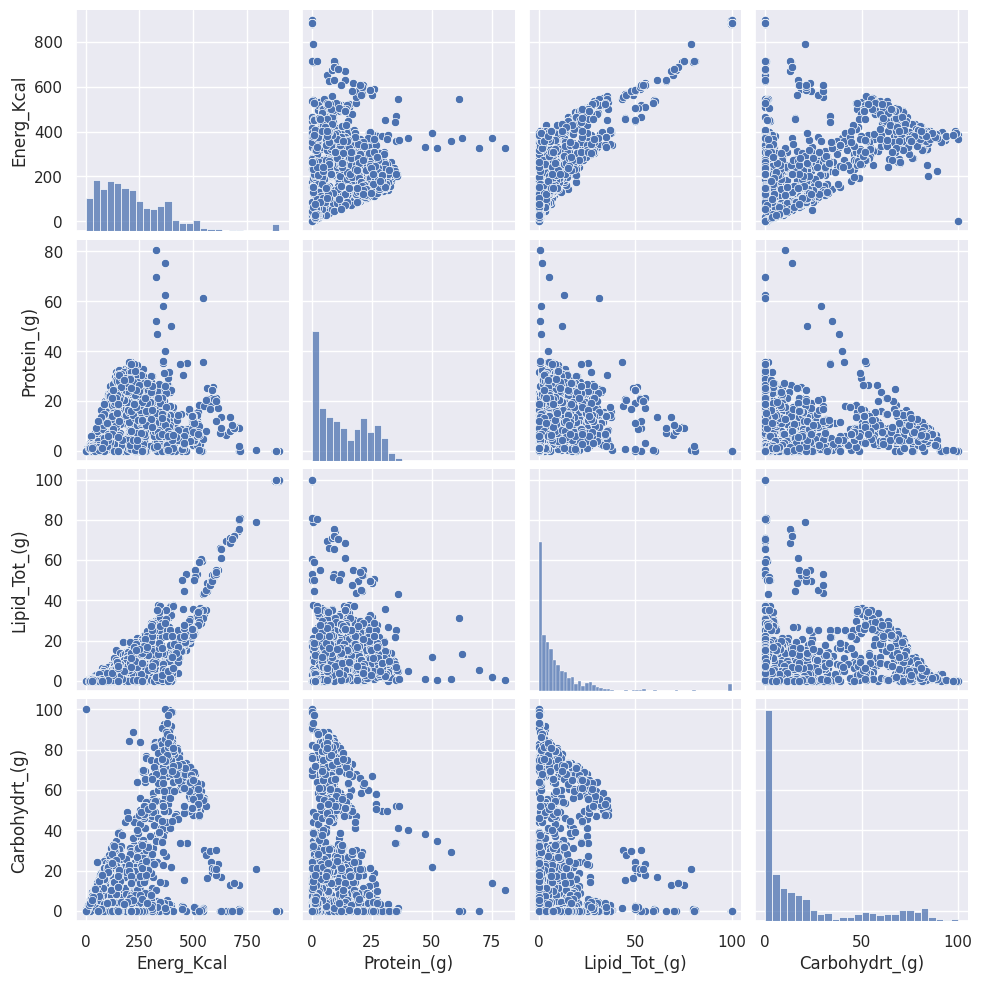

In [7]:
num_vars =['Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)',  'Carbohydrt_(g)']
sns.pairplot(food_df[num_vars])
plt.show()

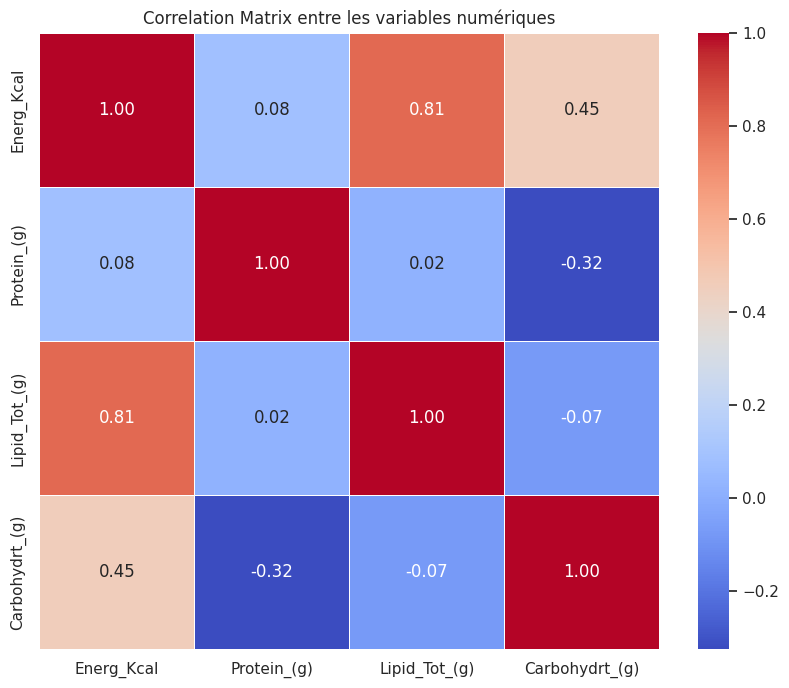

In [8]:
corr_matrix = food_df[num_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap= "coolwarm", fmt=".2f", linewidths= 0.5)
plt.title("Correlation Matrix entre les variables numériques")
plt.show()

In [9]:
print(food_df.columns)

Index(['Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)',
       'Carbohydrt_(g)', 'Calcium_(mg)', 'Sodium_(mg)', 'FA_Sat_(g)',
       'FA_Mono_(g)', 'FA_Poly_(g)', 'Cholestrl_(mg)', 'has_fiber',
       'has_vitamine', 'sugar'],
      dtype='object')


In [10]:
print(food_df.columns)
categorical_variables= food_df.select_dtypes(include=["float64","int64"]).columns
food_code_encoded = pd.get_dummies(food_df, columns = categorical_variables, drop_first=True)
print("Nombre de colonnes apres tranformantion: ", food_code_encoded.shape[1] )
food_code_encoded.head()
print(food_df.shape)

Index(['Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)',
       'Carbohydrt_(g)', 'Calcium_(mg)', 'Sodium_(mg)', 'FA_Sat_(g)',
       'FA_Mono_(g)', 'FA_Poly_(g)', 'Cholestrl_(mg)', 'has_fiber',
       'has_vitamine', 'sugar'],
      dtype='object')
Nombre de colonnes apres tranformantion:  9913
(2000, 15)


Question 5

In [11]:
categorical_columns = ['has_fiber', 'has_vitamine', 'sugar']
food_df_encoded = pd.get_dummies(food_df, columns=categorical_columns, drop_first=True)
print("Shape après l'encodage des variables catégorielles :", food_df_encoded.shape)
print(food_df_encoded.columns)

Shape après l'encodage des variables catégorielles : (2000, 16)
Index(['Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)',
       'Carbohydrt_(g)', 'Calcium_(mg)', 'Sodium_(mg)', 'FA_Sat_(g)',
       'FA_Mono_(g)', 'FA_Poly_(g)', 'Cholestrl_(mg)', 'has_fiber_1',
       'has_vitamine_1', 'sugar_little', 'sugar_no'],
      dtype='object')


Question 6

In [12]:
from sklearn.model_selection import train_test_split
x = food_df_encoded.drop(columns=["Energ_Kcal"])
y = food_df_encoded["Energ_Kcal"]
x_no_test, x_test, y_no_test, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
print("Nombre de lignes dans l'ensemble de test :", x_test.shape[0])

Nombre de lignes dans l'ensemble de test : 300


Question 7

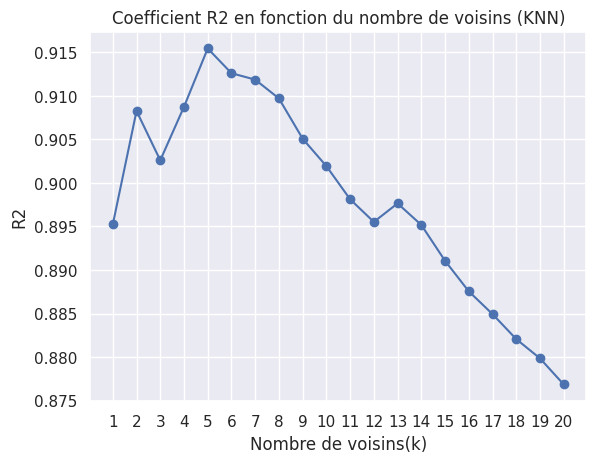

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_no_test, y_no_test, test_size=0.2, random_state=42)
k_values = range(1, 21)
r2_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_val)
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)
plt.plot(k_values, r2_scores, marker='o')
plt.xlabel('Nombre de voisins(k)')
plt.ylabel('R2')
plt.title('Coefficient R2 en fonction du nombre de voisins (KNN)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Question 8

In [14]:
optimal_k = k_values[np.argmax(r2_scores)]
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(x_no_test, y_no_test)
r2_test = knn_optimal.score(x_test, y_test)
print(f"Le nombre optimal de voisins est : {optimal_k}")
print(f"Le score R2 sur l'ensemble de test est : {r2_test}")

Le nombre optimal de voisins est : 5
Le score R2 sur l'ensemble de test est : 0.8858553825262918


Question 9

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2',n_jobs=-1)
grid_search.fit(x_no_test, y_no_test)
best_params = grid_search.best_params_
print("Les meilleurs valeurs des hyper_paramètres :")
print(best_params)

Les meilleurs valeurs des hyper_paramètres :
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Question 10

In [16]:
rf_optimal = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=2,n_estimators=200, random_state=42)
rf_optimal.fit(x_no_test, y_no_test)
r2_test = rf_optimal.score(x_test, y_test)
print(f"Le score R2 de la forest aléattoire avec les meilleurs hyper-paramètres test est : {r2_test:.4f}")

Le score R2 de la forest aléattoire avec les meilleurs hyper-paramètres test est : 0.9952


Question 11

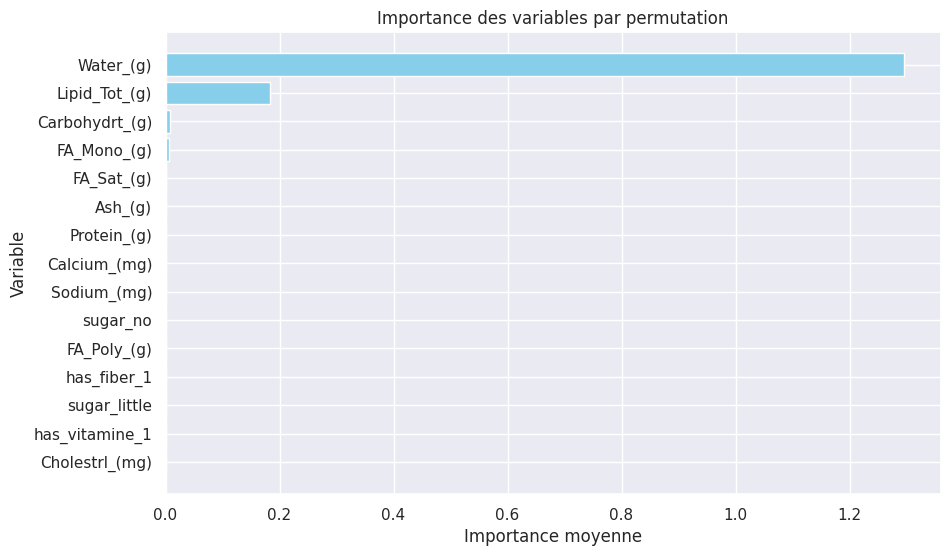

Les 5 variables les plus importantes sont :
         Variable  Importance
0       Water_(g)    1.294894
2   Lipid_Tot_(g)    0.183946
4  Carbohydrt_(g)    0.007313
8     FA_Mono_(g)    0.006779
7      FA_Sat_(g)    0.001266


In [17]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf_optimal, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importance_scores = result.importances_mean
importance_df = pd.DataFrame({'Variable': x_test.columns, 'Importance': importance_scores})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'],color = 'skyblue')
plt.xlabel('Importance moyenne')
plt.ylabel('Variable')
plt.title('Importance des variables par permutation')
plt.gca().invert_yaxis()
plt.show()
print("Les 5 variables les plus importantes sont :")
print(importance_df.head(5))

# New Section

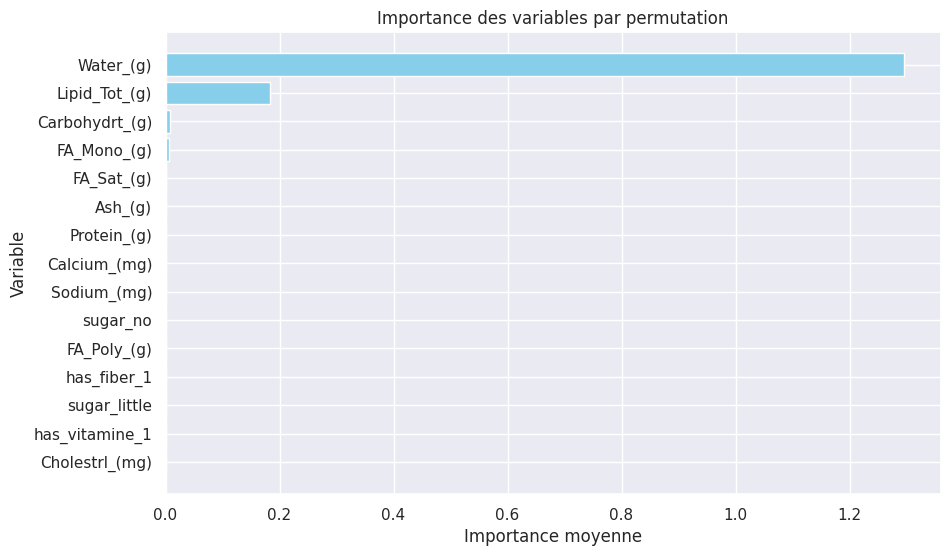

Les 5 variables les plus importantes sont :
         Variable  Importance
0       Water_(g)    1.294894
2   Lipid_Tot_(g)    0.183946
4  Carbohydrt_(g)    0.007313
8     FA_Mono_(g)    0.006779
7      FA_Sat_(g)    0.001266


In [18]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf_optimal, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importance_scores = result.importances_mean
importance_df = pd.DataFrame({'Variable': x_test.columns, 'Importance': importance_scores})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'],color = 'skyblue')
plt.xlabel('Importance moyenne')
plt.ylabel('Variable')
plt.title('Importance des variables par permutation')
plt.gca().invert_yaxis()
plt.show()
print("Les 5 variables les plus importantes sont :")
print(importance_df.head())

question 4

In [19]:
from sklearn.preprocessing import StandardScaler
columns_to_drop = ['has_fiber', 'has_vitamine', 'sugar']
for col in columns_to_drop:
    if col in food_df.columns:
        food_df = food_df.drop(columns=[col])
    else:
        print(f"Column '{col}' ")
num_vars = food_df.select_dtypes(include=["number"]).columns
num_vars = num_vars.drop("Energ_Kcal", errors='ignore')
scaler = StandardScaler()
food_df[num_vars] = scaler.fit_transform(food_df[num_vars])
print("Colonnes après transformation : ", food_df.columns)
print(food_df[num_vars].describe())

Colonnes après transformation :  Index(['Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)',
       'Carbohydrt_(g)', 'Calcium_(mg)', 'Sodium_(mg)', 'FA_Sat_(g)',
       'FA_Mono_(g)', 'FA_Poly_(g)', 'Cholestrl_(mg)'],
      dtype='object')
          Water_(g)   Protein_(g)  Lipid_Tot_(g)       Ash_(g)  \
count  2.000000e+03  2.000000e+03   2.000000e+03  2.000000e+03   
mean   6.519230e-16 -1.190159e-16  -3.099743e-16 -1.332268e-15   
std    1.000250e+00  1.000250e+00   1.000250e+00  1.000250e+00   
min   -1.885637e+00 -1.164947e+00  -6.587693e-01 -6.449241e-01   
25%   -5.630081e-01 -9.234164e-01  -5.849358e-01 -3.469320e-01   
50%    2.975321e-01 -2.117550e-01  -3.221388e-01 -2.192211e-01   
75%    6.942019e-01  8.153279e-01   1.585608e-01  1.577035e-01   
max    1.506633e+00  6.287870e+00   5.598303e+00  2.482631e+01   

       Carbohydrt_(g)  Calcium_(mg)   Sodium_(mg)    FA_Sat_(g)   FA_Mono_(g)  \
count    2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2

In [20]:
print(food_df.columns)


Index(['Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)',
       'Carbohydrt_(g)', 'Calcium_(mg)', 'Sodium_(mg)', 'FA_Sat_(g)',
       'FA_Mono_(g)', 'FA_Poly_(g)', 'Cholestrl_(mg)'],
      dtype='object')


In [21]:
# prompt: Notre objectif est de prédire les calories d'un aliment (colonne "Energ_Kcal"). Centrez et réduisez les 11 variables numériques qui seront utilisées en entrée du modèle (toutes les colonnes numériques sauf "Energ_Kcal").

# Assuming food_df is your DataFrame
# Select only numerical columns excluding "Energ_Kcal"
numerical_columns = food_df.select_dtypes(include=np.number).drop('Energ_Kcal', axis=1, errors='ignore').columns

# Center and reduce the selected columns
for col in numerical_columns:
  food_df[col] = (food_df[col] - food_df[col].mean()) / food_df[col].std()
print(food_df[numerical_columns].describe())
# Print the updated DataFrame
food_df


          Water_(g)   Protein_(g)  Lipid_Tot_(g)       Ash_(g)  \
count  2.000000e+03  2.000000e+03   2.000000e+03  2.000000e+03   
mean  -1.776357e-17  3.463896e-17   9.769963e-18 -5.329071e-18   
std    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00   
min   -1.885165e+00 -1.164656e+00  -6.586046e-01 -6.447629e-01   
25%   -5.628673e-01 -9.231855e-01  -5.847896e-01 -3.468453e-01   
50%    2.974577e-01 -2.117021e-01  -3.220583e-01 -2.191663e-01   
75%    6.940283e-01  8.151241e-01   1.585211e-01  1.576640e-01   
max    1.506256e+00  6.286298e+00   5.596903e+00  2.482010e+01   

       Carbohydrt_(g)  Calcium_(mg)   Sodium_(mg)    FA_Sat_(g)   FA_Mono_(g)  \
count    2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean     3.019807e-17  1.243450e-17  1.065814e-17 -1.776357e-17  1.421085e-17   
std      1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min     -7.348871e-01 -3.354731e-01 -3.490429e-01 -5.223362e-01 -5.705072e-01   


,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Calcium_(mg),Sodium_(mg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
INF FORM.MEAD JOHNSON.ENFAMIL.NUTRAMIGEN.W/IRON.LC.NOT RECON,0.683425,127.0,-0.838694,-0.237609,-0.318472,-0.238893,0.180782,-0.283614,-0.086328,-0.217238,-0.180851,-0.401775
CAMPBELL'S RED&WHITE.CHICK WON TON SOUP.COND,1.138103,40.0,-0.944886,-0.609186,-0.155327,-0.494829,-0.335473,0.403386,-0.462213,-0.514250,-0.412842,-0.361664
BEEF.NZ.IMP.EYE RND.LN & FAT.RAW,0.588418,129.0,0.671073,-0.350834,-0.290099,-0.684985,-0.318265,-0.306514,-0.284114,-0.351007,-0.366403,0.079555
"BEEF.RND.EYE OF RND.RST.LN.1/8"" FAT.ALL GRDS.RAW",0.606401,124.0,0.922239,-0.470939,-0.261726,-0.734887,-0.249431,-0.283614,-0.366803,-0.391534,-0.387020,0.189859
VEAL.SEAM FAT ONLY.CKD,-0.663982,505.0,-0.134136,2.479784,-0.442604,-0.655120,-0.150482,-0.254171,1.948632,2.347050,0.182046,0.420497
...,...,...,...,...,...,...,...,...,...,...,...,...
CHICKEN.BROILERS OR FRYERS.DK MEAT.MEAT&SKN.CKD.FRIED.FLR,-0.160783,285.0,1.348852,0.399202,-0.300739,-0.580645,-0.262337,-0.251990,0.171280,0.373246,0.369800,0.520774
MACARONI & CHS.FRZ ENTREE,0.469319,149.0,-0.647549,-0.257627,-0.180153,-0.081626,0.154969,-0.032805,-0.127369,-0.367444,-0.140018,-0.301498
USDA COMMODITY.PORK.CURED.HAM.BNLESS.CKD.HTD,0.551093,149.0,0.575039,-0.181935,0.596561,-0.734887,-0.309660,0.910457,-0.264729,-0.164665,-0.263319,0.330247
BABYFOOD.MULTIGRAIN WHL GRAIN CRL.DRY,-1.729761,405.0,-0.587528,-0.267635,0.075205,2.323116,2.891119,-0.349043,-0.362108,-0.387567,0.106785,-0.401775


A partir d'ici, écrire le code permettant de répondre aux questions.